In [4]:
#import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#read the data
df = pd.read_csv('info.csv')

In [6]:
#check the data
df.head(5)

,raw_stem,raw_product_id,timestamp,received_date,product_type,camera_id,crop_type,camera_angle,product_id,stem,...,has_kizu_ware,has_kizu_zairyou,has_ignore_shallow,has_ignore_cutting,has_ignore_oil,has_sabi,has_unuse,is_anomaly_image,is_anomaly_product,data_block_id
0,301_20200825125742545,301,20200825125742545,20201005,H,2,uncrop,0,20200825125742545,20200825125742545_2_0_uncrop,...,0,0,1,0,0,1,0,0.0,1.0,8
1,301_20200825125744498,301,20200825125744498,20201005,H,2,uncrop,1,20200825125742545,20200825125742545_2_1_uncrop,...,0,0,1,0,0,1,0,1.0,1.0,8
2,301_20200825125747298,301,20200825125747298,20201005,H,2,uncrop,2,20200825125742545,20200825125742545_2_2_uncrop,...,0,0,0,0,0,1,0,1.0,1.0,8
3,301_20200825125748732,301,20200825125748732,20201005,H,2,uncrop,3,20200825125742545,20200825125742545_2_3_uncrop,...,0,0,0,0,0,1,0,1.0,1.0,8
4,301_20200825125750683,301,20200825125750683,20201005,H,2,uncrop,4,20200825125742545,20200825125742545_2_4_uncrop,...,0,0,0,0,0,1,0,1.0,1.0,8


In [7]:
df['crop_type'][1]

'uncrop'

In [8]:
#separate the df to "uncrop" and "tobu or ziku"(take a minutes)
df_uncrop = pd.DataFrame()
df_tobu_or_ziku = pd.DataFrame()
for i in range(len(df)):
    if df['crop_type'][i] == 'uncrop':
        df_uncrop = df_uncrop.append(df.iloc[i])
    else:
        df_tobu_or_ziku = df_tobu_or_ziku.append(df.iloc[i])

In [9]:
#reset the index
df_uncrop = df_uncrop.reset_index()
df_tobu_or_ziku = df_tobu_or_ziku.reset_index()

In [10]:
#check the number of culumns
print(f"df_uncrop:{len(df_uncrop)},df_tobu_or_ziku:{len(df_tobu_or_ziku)}")

df_uncrop:4344,df_tobu_or_ziku:8688


In [11]:
#count wounds by type (df_uncrop)
df_counter = pd.DataFrame(np.zeros(96).reshape(12, 8),
                  columns=['has_kizu_dakon', 'has_kizu_ware', 'has_kizu_zairyou', \
                           'has_ignore_shallow', 'has_ignore_cutting', 'has_ignore_oil',\
                           'has_sabi', 'has_unuse'], # kizu_type
                  index=['cam_0', 'cam_1','cam_2','cam_3','cam_4','cam_5','cam_6','cam_7','cam_8','cam_9','cam_10','cam_11']) #cam_X == camara_angle
for i in range(len(df_uncrop)):
    for k in df_counter.columns:
        if df_uncrop[k][i] == 1.0:
            df_counter[k][int(df_uncrop['camera_angle'][i])] += 1

In [12]:
#Check the result
df_counter

,has_kizu_dakon,has_kizu_ware,has_kizu_zairyou,has_ignore_shallow,has_ignore_cutting,has_ignore_oil,has_sabi,has_unuse
cam_0,57.0,0.0,13.0,84.0,68.0,3.0,261.0,7.0
cam_1,88.0,1.0,14.0,123.0,61.0,7.0,252.0,6.0
cam_2,103.0,2.0,18.0,216.0,48.0,7.0,244.0,7.0
cam_3,133.0,2.0,18.0,201.0,6.0,6.0,220.0,6.0
cam_4,119.0,2.0,21.0,276.0,0.0,3.0,192.0,7.0
cam_5,96.0,2.0,24.0,82.0,0.0,2.0,204.0,9.0
cam_6,122.0,2.0,20.0,266.0,5.0,5.0,202.0,7.0
cam_7,120.0,1.0,16.0,157.0,23.0,8.0,245.0,5.0
cam_8,99.0,1.0,13.0,222.0,27.0,8.0,246.0,4.0
cam_9,107.0,1.0,11.0,87.0,40.0,8.0,249.0,5.0


1156.0


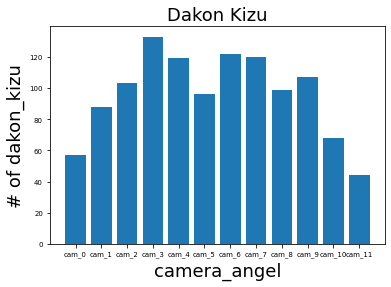

In [14]:
#plot the result
x = df_counter.index
y = df_counter['has_kizu_dakon']
plt.title("Dakon Kizu", fontsize=18)
plt.xlabel("camera_angel", fontsize=18)
plt.ylabel("# of dakon_kizu", fontsize=18)
plt.tick_params(labelsize=7)
plt.bar(x,y)
plt.savefig("./Figure/Dakon_CamAngle.png")

print(sum(y))

15.0


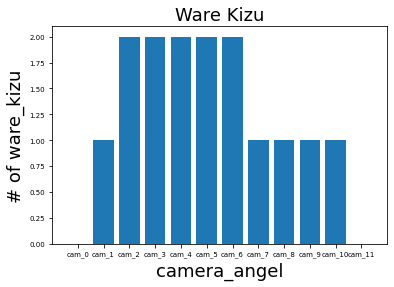

In [15]:
#plot the result
x = df_counter.index
y = df_counter['has_kizu_ware']
plt.title("Ware Kizu", fontsize=18)
plt.xlabel("camera_angel", fontsize=18)
plt.ylabel("# of ware_kizu", fontsize=18)
plt.tick_params(labelsize=7)
plt.bar(x,y)
plt.savefig("./Figure/Ware_CamAngle.png")

print(sum(y))

183.0


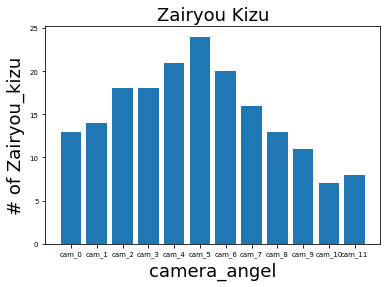

In [16]:
#plot the result
x = df_counter.index
y = df_counter['has_kizu_zairyou']
plt.title("Zairyou Kizu", fontsize=18)
plt.xlabel("camera_angel", fontsize=18)
plt.ylabel("# of Zairyou_kizu", fontsize=18)
plt.tick_params(labelsize=7)
plt.bar(x,y)
plt.savefig("./Figure/Zairyou_CamAngle.png")

print(sum(y))

In [17]:
anomaly_count = pd.DataFrame(np.zeros(24).reshape(12,2),
                            columns=['nomaly','anomaly'],
                            index=['cam_0', 'cam_1','cam_2','cam_3','cam_4','cam_5','cam_6','cam_7','cam_8','cam_9','cam_10','cam_11'])
for i in range(len(df)):
    if df['is_anomaly_image'][i] == 1.0:
        anomaly_count['anomaly'][df['camera_angle'][i]] += 1
    else:
        anomaly_count['nomaly'][df['camera_angle'][i]] += 1

anomaly_count

,nomaly,anomaly
cam_0,942.0,144.0
cam_1,869.0,217.0
cam_2,826.0,260.0
cam_3,762.0,324.0
cam_4,789.0,297.0
cam_5,834.0,252.0
cam_6,787.0,299.0
cam_7,796.0,290.0
cam_8,857.0,229.0
cam_9,848.0,238.0


In [18]:
sum(anomaly_count['nomaly'])

10225.0

In [19]:
sum(anomaly_count['anomaly'])

2807.0

In [20]:
#Count the "Actual" number of wound
'''
I think the number of wound which I have calucualted ever is not the number of wound, because if there is wound at camera_angle "3", in most of case, the camera_angle "2" and "4" find 
the wound. So, the acutual the number of wound is "1",but now I counted 3.
'''
df2 = df_uncrop
df2['new_dakon_kizu'] = 0

'''
new_dakon_kizu is an Acutual the number of kizu.

         has_dakon_kizu new_dakon_kizu  
cam_angle
0              0             0
1              1             1
2              1             0
3              0             0
4              1      |\     0
5              1    |-  \    1
6              1    |-  /    0
7              0      |/     0
8              1             0
9              1             1
10             1             0
11             1             0
'''

for i in range(0,df2.shape[0],12):
    flag = 0
    temp_cam_angle = 0
    for k in range(12):
        if df2['has_kizu_dakon'][i+k] == 1 and flag == 0:
            flag = 1
            temp_cam_id = i
        if df2['has_kizu_dakon'][i+k] == 0 and flag == 1:
            df2['new_dakon_kizu'][i+int((temp_cam_angle+k)/2)] = 1
            flag = 0
            temp_cam_angle = 0

<ipython-input-20-86de33c892a8>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['new_dakon_kizu'][i+int((temp_cam_angle+k)/2)] = 1


In [21]:
#check the new_dakon_kizu
df2['new_dakon_kizu'].head(10)

0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    0
8    0
9    0
Name: new_dakon_kizu, dtype: int64

In [22]:
#count actual the number of dakon kizu by camera_angle
dakon_camera_num = [0 for _ in range(12)]
for i in range(df2.shape[0]):
    if df2['new_dakon_kizu'][i] == 1:
        dakon_camera_num[int(df2['camera_angle'][i])] += 1

In [23]:
dakon_camera_num

[13, 21, 73, 56, 58, 79, 0, 0, 0, 0, 0, 0]

In [24]:
#This is the same proces as dakon_kizu
#ware
df2['new_ware_kizu'] = 0
for i in range(0,df2.shape[0],12):
    flag = 0
    temp_cam_angle = 0
    for k in range(12):
        if df2['has_kizu_ware'][i+k] == 1 and flag == 0:
            flag = 1
            temp_cam_id = i
        if df2['has_kizu_ware'][i+k] == 0 and flag == 1:
            df2['new_ware_kizu'][i+int((temp_cam_angle+k)/2)] = 1
            flag = 0
            temp_cam_angle = 0
            
ware_camera_num = [0 for _ in range(12)]
for i in range(df2.shape[0]):
    if df2['new_ware_kizu'][i] == 1:
        ware_camera_num[int(df2['camera_angle'][i])] += 1

        
#zairyou 
df2['new_zairyou_kizu'] = 0
for i in range(0,df2.shape[0],12):
    flag = 0
    temp_cam_angle = 0
    for k in range(12):
        if df2['has_kizu_zairyou'][i+k] == 1 and flag == 0:
            flag = 1
            temp_cam_id = i
        if df2['has_kizu_zairyou'][i+k] == 0 and flag == 1:
            df2['new_zairyou_kizu'][i+int((temp_cam_angle+k)/2)] = 1
            flag = 0
            temp_cam_angle = 0
zairyou_camera_num = [0 for _ in range(12)]
for i in range(df2.shape[0]):
    if df2['new_zairyou_kizu'][i] == 1:
        zairyou_camera_num[int(df2['camera_angle'][i])] += 1

<ipython-input-24-bfa34977fe39>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['new_ware_kizu'][i+int((temp_cam_angle+k)/2)] = 1
<ipython-input-24-bfa34977fe39>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['new_zairyou_kizu'][i+int((temp_cam_angle+k)/2)] = 1


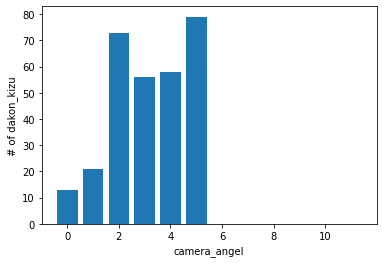

In [25]:
#plot the result
x = [i for i in range(12)]
plt.bar(x,dakon_camera_num)
plt.xlabel("camera_angel")
plt.ylabel("# of dakon_kizu")
plt.savefig("Figure/#_of_dakon_kizu")

2


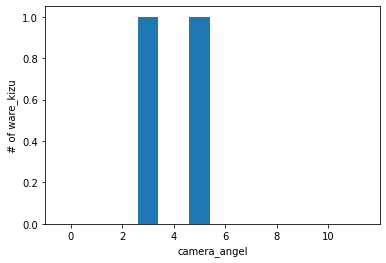

In [26]:
#plot the result
x = [i for i in range(12)]
plt.bar(x,ware_camera_num)
plt.xlabel("camera_angel")
plt.ylabel("# of ware_kizu")
plt.savefig("Figure/#_of_ware_kizu")
print(sum(ware_camera_num))

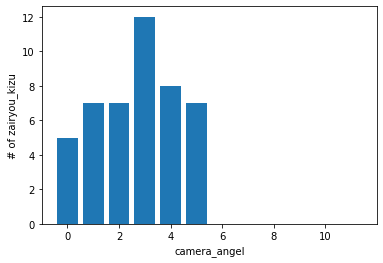

In [27]:
#plot the result
x = [i for i in range(12)]
plt.bar(x,zairyou_camera_num)
plt.xlabel("camera_angel")
plt.ylabel("# of zairyou_kizu")
plt.savefig("Figure/#_of_zairyou_kizu")